In [485]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#### Normalization Schemes

In [486]:
def sum_norm(A):
    """Normalize array by sum across row dimension
    
    A (np.ndarray): multidimensional array
    """
    dim = len(A.shape)
    
    if dim == 1:
        return A / A.sum()
    elif dim > 1:
        return A / A.sum(axis=-1, keepdims=True)
    
def softmax_norm(A):
    """Normalize array by softmax across row dimension
    
    A (np.ndarray): multidimensional array
    """
    dim = len(A.shape)
    
    if dim == 1:
        return np.exp(log_softmax(A, axis=0))
    elif dim > 1:
        return np.exp(log_softmax(A, axis=1))
    
def log_softmax(A, axis=0):
    """Computes log softmax using logsumexp trick
    
    A (np.ndarray): multidimensional array
    axis (int): axis to operate over
    """
    maxes = A.max(axis=axis, keepdims=True)
    lse = np.log(np.exp(A - maxes).sum(axis=axis, keepdims=True))
    return A - maxes - lse

#### States

In [571]:
states = list(range(10))
num_states = len(states)

# expected state if final distribution is uniform
print("Expected state (uniform stationary distribution): ", sum(range(num_states))/num_states)

Expected state (uniform stationary distribution):  4.5


#### Transition matrices

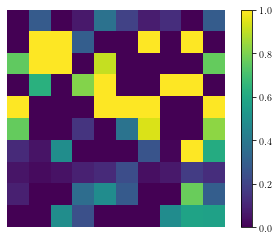

In [579]:
# random transition matrix
Q = np.random.normal(loc=0.01, size=(num_states, num_states))
Q = sum_norm(Q)

# visualize matrix
_ = plt.imshow(Q, vmin=0, vmax=1)
_ = plt.colorbar()
_ = plt.axis('off')

#### Initial Distributions

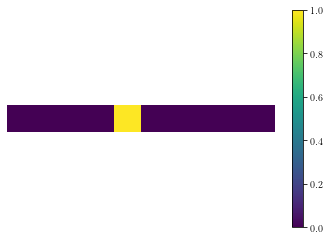

In [585]:
# initial distribution
t = np.zeros(num_states)
t[4] = 1

# visualize initial distribution
_ = plt.imshow(t[np.newaxis, :], vmin=0, vmax=1)
_ = plt.colorbar()
_ = plt.axis('off')

#### N-step transition probability

In [586]:
def run_chain(Q, t, N):
    """Runs a markov chain.
    
    Returns marginal probability evolution as (NxD) matrix,
    as well as nth power transition matrix
    
    Args:
        Q (np.ndarray): transition matrix
        t (np.array): initial discrete distribution
        N (int): number of steps to run the process for
    """
    # initialize state evolution
    states = np.zeros((N + 1, len(t)))
    states[0] = t
    
    # initialize n-step transition matrix and init distribution
    transition = np.empty_like(Q)
    transition[:] = Q
    
    prob = np.empty_like(t)
    prob[:] = t.T @ Q
    
    # run the markov chain
    for i in range(N):
        
        # compute transition matrix
        # renormalize matrix to correct for numerical errors
        transition = softmax_norm(Q @ transition)
        
        # compute marginal distribution & renorm as well
        prob = softmax_norm(t.T @ transition)
        
        # add to states
        states[i + 1] = prob
        
    return transition, states

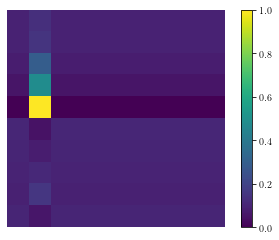

In [587]:
# run a markov chain and computed expected states over time
Qn, probs = run_chain(Q, t, 50)

E_state = (probs * states).sum(axis=1)

# visualize new transition matrix
# visualize matrix
_ = plt.imshow(Qn, vmin=0, vmax=1)
_ = plt.colorbar()
_ = plt.axis('off')

#### Visualization

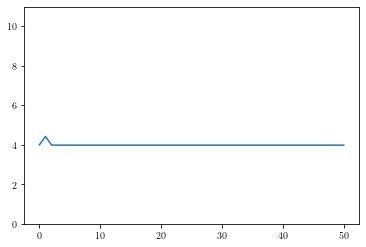

In [588]:
_ = plt.plot(E_state)
_ = plt.ylim(0, num_states + 1)

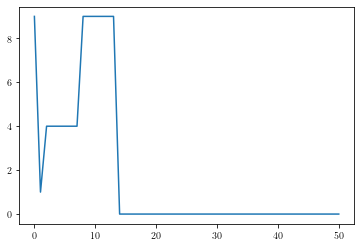

In [584]:
_ = plt.plot(np.argmax(probs, axis=1))